## Problem: 4 Class Classification: - Supp, Elite, Credit,None

- The Basic Idea is to make a classifier that predicts whether the Customer will buy the card or not, if yes then which one. 
- Then, we will drop the Customers whose prediction comes out to be 'None'.
- Once we have a list of candidates who will buy one of the 3 cards accodring to our classifier, we will take the top 1000 customers. The Criterion for making this selection will be to ensure that we don't sell the wrong card.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [2]:
data = pd.read_csv('./Dataset/Training_Dataset.csv')

## Part 01 : Preprocesing Steps

In [3]:
# Dropping Mvar1, Label Encoding Categorical Variable -> Mvar 12, Seperating Target Variabele

In [4]:
data.drop('mvar1',inplace=True,axis=1)
data.drop('cm_key',inplace=True,axis=1)

In [5]:
from sklearn import preprocessing

In [6]:
le = preprocessing.LabelEncoder()

In [7]:
le.fit(data['mvar12'])

LabelEncoder()

In [8]:
le.classes_

array(['Apparel', 'Automotive         ', 'Construction       ',
       'Consumables        ', 'Durable goods      ', 'Entertainment      ',
       'Finance            ', 'Household          ', 'Manufacturing      ',
       'Mining             ', 'Misc services      ', 'Non durable goods  ',
       'Office supplies    ', 'Personal services  ', 'Produce            ',
       'Social services    ', 'Transport          ', 'Unknown            '], dtype=object)

In [9]:
data['mvar12'] = le.transform(data['mvar12'])

In [10]:
target = list()
for i in range(len(data)):
    if data['mvar49'][i] == 1:
        target.append('Supp')
    elif data['mvar50'][i] == 1:
        target.append('Elite')
    elif data['mvar51'][i] == 1:
        target.append('Credit')
    else:
        target.append('None')

In [11]:
len(target)

40000

In [12]:
data['target']= target

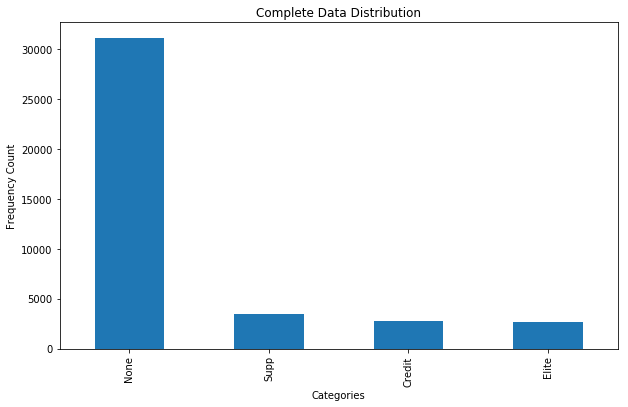

 No. of Supp Card Holders: 3447
 No. of Credit Card Holders: 2777
 No. of Elite Card Holders: 2654


In [13]:
plt.figure(figsize=(10,6))
data.target.value_counts().plot(kind='bar')
plt.title('Complete Data Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency Count')
plt.show()

print (" No. of Supp Card Holders:", len(data[data['target']=='Supp']))
print (" No. of Credit Card Holders:", len(data[data['target']=='Credit']))
print (" No. of Elite Card Holders:", len(data[data['target']=='Elite']))

In [14]:
data.head()

,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,...,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,target
0,0,106920,4,18,970,0.7969,0.1831,337236,1,6.0899,...,0,0,0,0,0,1,0,0,0,None
1,2,0,4,19,1030,0.0678,0.0000,2918974,1,4.2016,...,0,0,0,1,0,0,0,0,0,None
2,2,399168,4,35,327,0.7551,0.2986,498656,0,3.3760,...,0,0,0,0,0,1,0,0,0,None
3,0,267300,4,274,1258,0.7969,0.5297,2480074,1,4.1082,...,1,0,0,0,0,1,0,0,1,Credit
4,0,213840,6,1,0,2.3238,0.0000,2918974,0,0.0000,...,0,0,0,1,0,0,1,0,0,Supp


In [15]:
data.drop('mvar46',inplace=True,axis=1)
data.drop('mvar47',inplace=True,axis=1)
data.drop('mvar48',inplace=True,axis=1)
data.drop('mvar49',inplace=True,axis=1)
data.drop('mvar50',inplace=True,axis=1)
data.drop('mvar51',inplace=True,axis=1)

In [16]:
data.head()

,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,...,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,target
0,0,106920,4,18,970,0.7969,0.1831,337236,1,6.0899,...,129504.66,173841.11,131011.34,0,0,0,0,0,0,None
1,2,0,4,19,1030,0.0678,0.0000,2918974,1,4.2016,...,3666.10,21049.55,9146.66,0,0,0,0,0,0,None
2,2,399168,4,35,327,0.7551,0.2986,498656,0,3.3760,...,85357.68,38022.78,29979.13,0,0,0,0,0,0,None
3,0,267300,4,274,1258,0.7969,0.5297,2480074,1,4.1082,...,35437.46,23934.82,33299.45,1,0,0,1,0,0,Credit
4,0,213840,6,1,0,2.3238,0.0000,2918974,0,0.0000,...,91078.15,112817.05,53185.85,0,0,0,0,0,0,Supp


In [17]:
data['mvar12'].head()

0    12
1    17
2    10
3    15
4    17
Name: mvar12, dtype: int64

In [18]:
data.drop('target',inplace=True,axis=1)

In [19]:
min_max_scaler = preprocessing.MinMaxScaler()

In [20]:
X = min_max_scaler.fit_transform(data)

In [21]:
X

array([[ 0.        ,  0.24600291,  0.33333333, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18181818,  0.        ,  0.33333333, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18181818,  0.91841087,  0.33333333, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.16666667, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18181818,  0.06970083,  0.75      , ...,  0.        ,
         0.5       ,  0.        ],
       [ 0.72727273,  0.        ,  0.08333333, ...,  0.        ,
         0.        ,  0.        ]])

## Part 02: Splitting the Data into Trian & Test Set

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, target, stratify=target, test_size = 0.2)

### Distribution of Train & Test Set

In [24]:
y1 = pd.DataFrame({'pred':y_train}) 

In [25]:
y2 = pd.DataFrame({'pred':y_test}) 

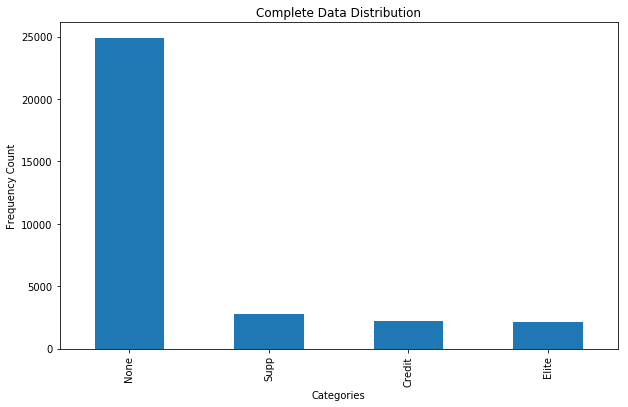

 No. of Supp Card Holders: 2758
 No. of Credit Card Holders: 2222
 No. of Elite Card Holders: 2123


In [26]:
plt.figure(figsize=(10,6))
y1.pred.value_counts().plot(kind='bar')
plt.title('Complete Data Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency Count')
plt.show()

print (" No. of Supp Card Holders:", len(y1[y1['pred']=='Supp']))
print (" No. of Credit Card Holders:", len(y1[y1['pred']=='Credit']))
print (" No. of Elite Card Holders:", len(y1[y1['pred']=='Elite']))

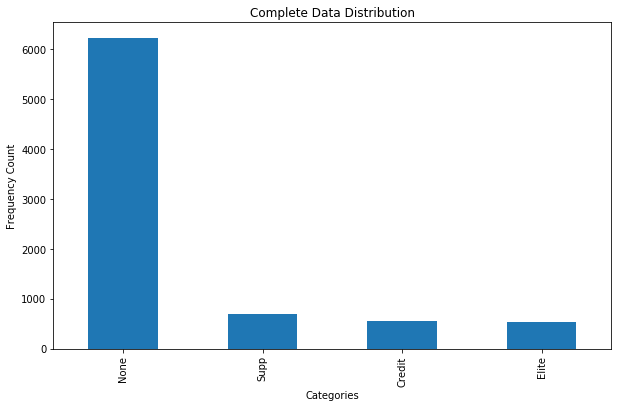

 No. of Supp Card Holders: 689
 No. of Credit Card Holders: 555
 No. of Elite Card Holders: 531


In [27]:
plt.figure(figsize=(10,6))
y2.pred.value_counts().plot(kind='bar')
plt.title('Complete Data Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency Count')
plt.show()

print (" No. of Supp Card Holders:", len(y2[y2['pred']=='Supp']))
print (" No. of Credit Card Holders:", len(y2[y2['pred']=='Credit']))
print (" No. of Elite Card Holders:", len(y2[y2['pred']=='Elite']))

___

## Part03: Training Models & Hyperparmater Tuning

## Model 1: Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
clf = RandomForestClassifier()

In [30]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

___

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
y_pred = clf.predict(X_test)

In [33]:
y_pred

array(['None', 'None', 'None', ..., 'None', 'None', 'None'],
      dtype='<U6')

In [34]:
from sklearn.metrics import precision_recall_fscore_support as score

In [35]:
precision, recall, fscore, support = score(y_test, y_pred)

In [36]:
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [ 0.23255814  0.26956522  0.78382582  0.26506024]
recall: [ 0.03603604  0.05838041  0.97156627  0.03193033]
fscore: [ 0.0624025   0.09597523  0.86765655  0.05699482]
support: [ 555  531 6225  689]


In [37]:
labels = list(set(y_pred))

In [38]:
cnf_matrix = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization
[[  20    8  524    3]
 [   5   31  492    3]
 [  55   67 6048   55]
 [   6    9  652   22]]


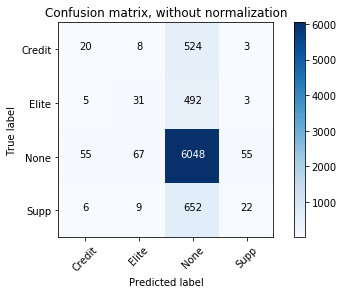

In [41]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='Confusion matrix, without normalization')
plt.show()

Normalized confusion matrix
[[ 0.03603604  0.01441441  0.94414414  0.00540541]
 [ 0.0094162   0.05838041  0.92655367  0.00564972]
 [ 0.00883534  0.01076305  0.97156627  0.00883534]
 [ 0.00870827  0.01306241  0.94629898  0.03193033]]


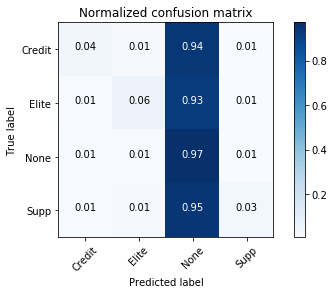

In [42]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labels, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

___

## Model 2: SVM Classifier

In [ ]:
from sklearn import svm

In [ ]:
clf2 = svm.SVC(decision_function_shape='ovo')

In [ ]:
clf2.fit(X,target)

## Model 3: SGD Classifier

In [ ]:
from sklearn import linear_model

In [ ]:
clf3 = linear_model.SGDClassifier(loss='log', penalty='elasticnet',alpha=0.0001,n_iter = 1000)

In [ ]:
clf3.fit(X,target)

___

## Predicting on LeaderBoard Data

In [69]:
leader = pd.read_csv('./Dataset/Leaderboard_Dataset.csv')

In [70]:
cm_key = leader['cm_key']

In [71]:
#cm_key

In [72]:
leader.drop('mvar1',inplace=True,axis=1)
leader.drop('cm_key',inplace=True,axis=1)

In [73]:
leader['mvar12'] = le.transform(leader['mvar12'])

In [74]:
min_max_scaler = preprocessing.MinMaxScaler()

In [75]:
X_1 = min_max_scaler.fit_transform(leader)

### Change the Classifier Here

In [76]:
out = clf.predict(X_1)

In [77]:
len(leader)

10000

In [78]:
len(out)

10000

In [79]:
sub = pd.DataFrame({'cm_key':cm_key,'pred':out})

In [80]:
sub_copy = sub

In [81]:
sub = sub[sub.pred != 'None']

In [82]:
#sub

In [83]:
sub = sub[:1000]

In [85]:
len(sub)

1000

In [84]:
sub.to_csv("Envible_VITVellore_3.csv",index=False)

## Other Functions to be incuded in Utils

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')